In [10]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

obj = None
messages = None

def getEmbeddingsToGraph(docs):
      docs = TruncatedSVD(n_components = 50).fit_transform(docs)
      embedded = TSNE(n_components = 2).fit_transform(docs)
      return embedded

def readMessages(numMessages = 500):
  with open("../message.json", "r") as f:
      obj = json.loads(f.read())
      messages = obj["messages"]
      
      print("Total Messages: %d" % len(messages))
      data, target, names = [], [], {}
  
      seen = 0
      for i in messages[-numMessages:]:
        if "content" in i:
            data.append(i["content"]) # clean data
            firstName = i["sender_name"].split()[0]
            if firstName not in names:
              names[firstName] = seen
              seen += 1
            target.append(names[firstName])
      
      return data, target, names

def vectorizeData(data):
  
  # TFIDF on data
  vectorizer =  TfidfVectorizer()
  docs = vectorizer.fit_transform(data)

  return docs, vectorizer

messageData, target, mappings = readMessages()
docs, vectorizer = vectorizeData(messageData)
finalData = getEmbeddingsToGraph(docs)


Total Messages: 563740


496 496


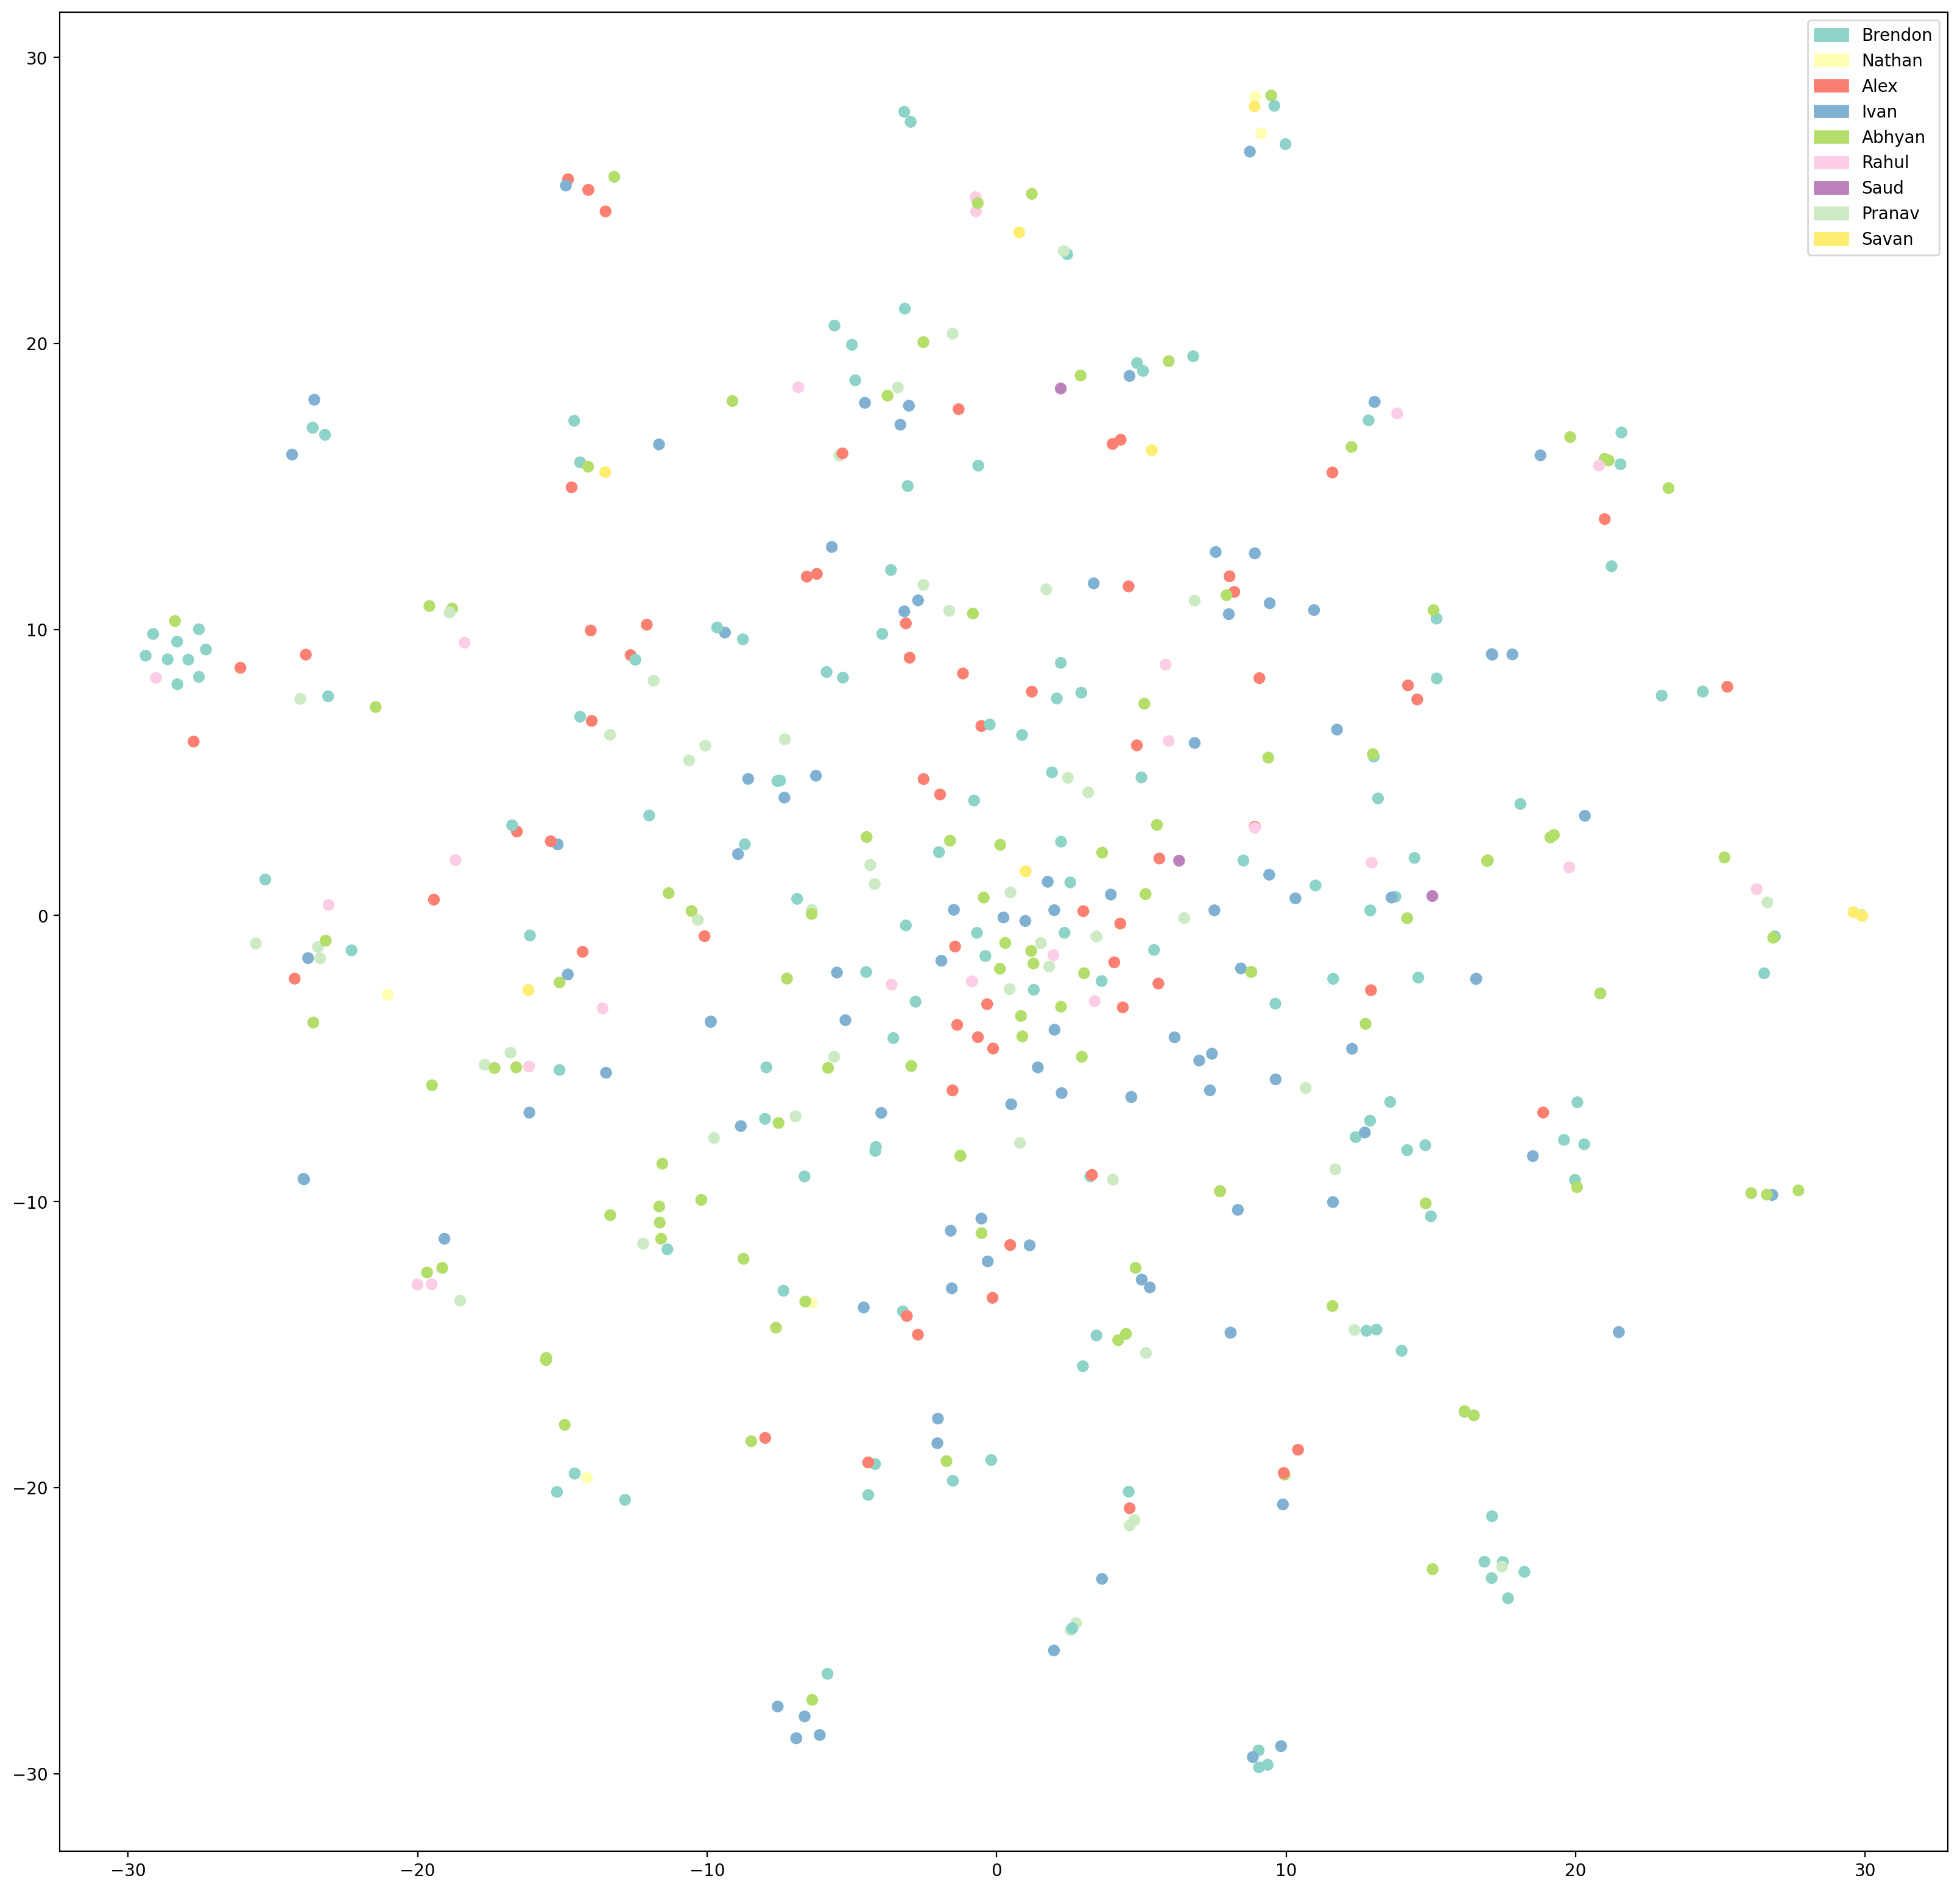

In [13]:
from matplotlib import cm, patches as mpatches
plt.figure(num=None, figsize=(20, 20), dpi=200, facecolor='w', edgecolor='k')

def plot(data, label, annotations):
  print(len(data), len(label))
  plt.scatter([x[0] for x in data], [x[1] for x in data], c=label, cmap = "Set3")
  for i, point in enumerate(data):
    x, y = point
    # plt.annotate(annotations[i], (x, y))
  
  handles = []
  norm = matplotlib.colors.Normalize(vmin=0, vmax=len(mappings.keys()) - 1)
  for name, value in mappings.items():
    handles.append(mpatches.Patch(color=cm.Set3(norm(value)), label=name))
  plt.legend(handles = handles)
  
  plt.show()

plot(finalData, target, messageData)

In [21]:
from sklearn.metrics.pairwise import linear_kernel

def getNearest(vectorizer, searchSet, queries, rawMessages):
  docs = vectorizer.transform(queries)
  res = {}
  for i, vec in enumerate(docs):
    cosine_similarities = linear_kernel(vec, searchSet).flatten()
    mostRelated = cosine_similarities.argsort()[-2:]
    res[queries[i]] = list(reversed([f'{rawMessages[x]} : {cosine_similarities[x]}' for x in mostRelated]))
  return res

  data, target, names = readMessages()

getNearest(vectorizer, docs, ["that's crazy", "dude"], messageData)

{"that's crazy": ["That's g : 1.0", 'that was 2.0 me : 0.49771485149232486'],
 'dude': ['no dude : 0.735218088544949',
  'dude i remember : 0.617393059422478']}